In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family'] = 'Times New Roman'

In [11]:
# Plotting hystersis and different limbs
data_origin = pd.read_csv('../ros_ws/src/csv/origin2.txt')[['theta_x', 'theta_y']]
data_origin_blue = pd.read_csv('../ros_ws/src/csv/origin_blue.txt')[['theta_x', 'theta_y']]
data_imm = pd.read_csv('../ros_ws/src/csv/immdiate2.txt')[['theta_x', 'theta_y']]
data_cool = pd.read_csv('../ros_ws/src/csv/3_min_cool_down_2.txt')[['theta_x', 'theta_y']]

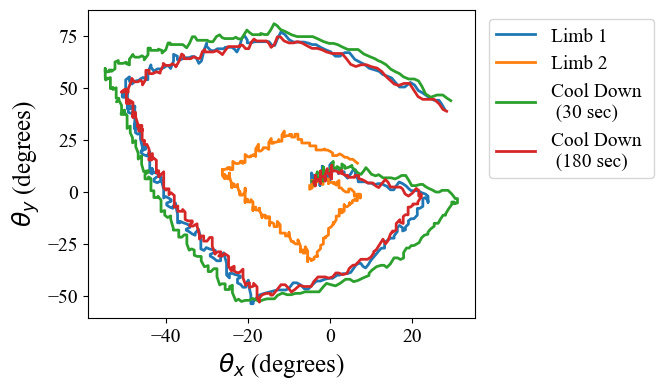

In [12]:
plt.figure(figsize=(5, 4))
plt.plot(data_origin['theta_x'], data_origin['theta_y'], label='Limb 1', linewidth=2)
plt.plot(data_origin_blue['theta_x'], data_origin_blue['theta_y'], label='Limb 2', linewidth=2)
plt.plot(data_imm['theta_x'], data_imm['theta_y'], label='Cool Down \n (30 sec)', linewidth=2)
plt.plot(data_cool['theta_x'], data_cool['theta_y'], label='Cool Down \n (180 sec)', linewidth=2)
plt.xlabel(r"$\theta_x$ (degrees)", fontsize=18)
plt.ylabel(r"$\theta_y$ (degrees)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')

In [13]:
df_exp = pd.read_csv('explore.csv')[['theta_x', 'theta_y']]
df_random = pd.read_csv('random.csv')[['theta_x', 'theta_y']]

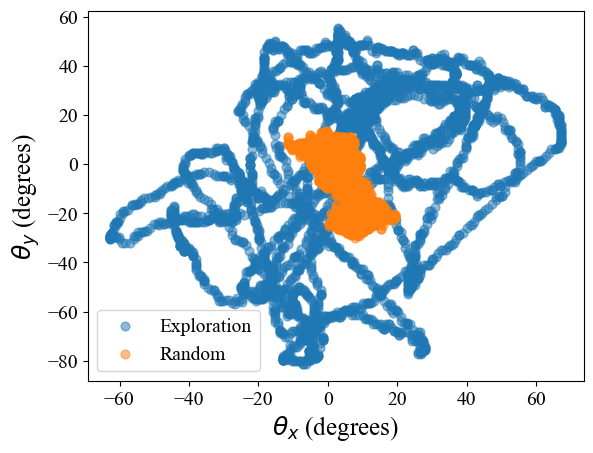

In [14]:
end = int(300//0.075)
plt.scatter(df_exp[['theta_x']].iloc[0:end], df_exp[['theta_y']].iloc[0:end], label='Exploration', s=40, alpha=0.5)
plt.scatter(df_random[['theta_x']].iloc[0:end], df_random[['theta_y']].iloc[0:end], label='Random', alpha=0.5, s=40)
plt.xlabel(r"$\theta_x$ (degrees)", fontsize=18)
plt.ylabel(r"$\theta_y$ (degrees)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)


# On ML POS ONLY

In [50]:

gnd_truth_sin = pd.read_csv('../robo_limb_ml/results/oct_31/test/test_LSTM_b1024_e400_s-1_len100_ema_0.8_1730123022_sin_purp_vid.csv', index_col=0)[100:]
lstm_sin = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_LSTM_b1024_e400_s-1_len100_ema_0.8_1730123022_sin_purp_vid.csv', index_col=0)[100:]
rnn_sin = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_RNN_b1024_e400_s-1_len100_ema_0.8_1730126891_sin_purp_vid.csv', index_col=0)[100:]
seq2seq_attn_sin = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_SEQ2SEQ_ATTENTION_b1024_e400_s-1_len100_ema_0.8_1728875793_sin_purp_vid.csv', index_col=0)[100:]
seq2seq_sin = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_SEQ2SEQ_b1024_e400_s-1_len100_ema_0.8_1728882683_sin_purp_vid.csv', index_col=0)[100:]

In [51]:
import matplotlib.gridspec as gridspec
import numpy as np
plt.rc('xtick', labelsize=14)  # Change '12' to your desired font size
plt.rc('ytick', labelsize=14)  # Change '12' to your desired font size
# Generate some data for plotting
def plot_graph(gnd_truth, lstm, seq2seq, seq2seq_attn, rnn, title):
    # Set up the figure and GridSpec layout with an increased width
    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(3, 6)  # Adjusted grid to allocate more columns

    # Square plot on the left (occupies 3 rows and 3 columns in the grid)
    ax1 = fig.add_subplot(gs[:, :3])
    line1,  = ax1.plot(lstm['theta_x'], lstm['theta_y'], label="LSTM", alpha=0.5)
    line2,  = ax1.plot(rnn['theta_x'], rnn['theta_y'], label="RNN", alpha=0.5)
    line3,  = ax1.plot(seq2seq_attn['theta_x'], seq2seq_attn['theta_y'], label="Seq2Seq Attn", alpha=0.5)
    line4,  = ax1.plot(seq2seq['theta_x'], seq2seq['theta_y'], label="Seq2Seq", linewidth=3)
    line5,  = ax1.plot(gnd_truth['theta_x'], gnd_truth['theta_y'], label="Gnd Truth", linewidth=3)
    ax1.set_title("Predicted v.s. Actual Trajectory", fontsize=16)
    ax1.set_xlabel(r"$\theta_x$", fontsize=16)
    ax1.set_ylabel(r"$\theta_y$", fontsize=16)
    # ax1.legend(loc='center', fontsize=14)

    # Three rectangular plots stacked to the right, occupying more columns
    ax2 = fig.add_subplot(gs[0, 3:])
    ax2.plot(lstm['time_begin_traj'], lstm['vel_x'], label="LSTM", alpha=0.5)
    ax2.plot(rnn['time_begin_traj'], rnn['vel_x'], label="RNN", alpha=0.5)
    ax2.plot(seq2seq_attn['time_begin_traj'], seq2seq_attn['vel_x'], label="Seq2Seq Attn", alpha=0.5)
    ax2.plot(seq2seq['time_begin_traj'], seq2seq['vel_x'], label="Seq2Seq")
    ax2.plot(gnd_truth['time_begin_traj'], gnd_truth['vel_x'], label="Gnd Truth")
    ax2.set_title("Predicted v.s. Actual X Velocity", fontsize=16)
    ax2.tick_params(labelbottom=False)
    ax2.set_ylabel(r"$\dot\theta_x$", fontsize=16)
    # ax2.legend()

    ax3 = fig.add_subplot(gs[1, 3:], sharex=ax2)
    ax3.plot(lstm['time_begin_traj'], lstm['vel_y'], label="LSTM", alpha=0.5)
    ax3.plot(rnn['time_begin_traj'], rnn['vel_y'], label="RNN", alpha=0.5)
    ax3.plot(seq2seq_attn['time_begin_traj'], seq2seq_attn['vel_y'], label="Seq2Seq Attn", alpha=0.5)
    ax3.plot(seq2seq['time_begin_traj'], seq2seq['vel_y'], label="Seq2Seq")
    ax3.plot(gnd_truth['time_begin_traj'], gnd_truth['vel_y'], label="Gnd Truth")
    ax3.set_title("Predicted v.s. Actual Y Velocity", fontsize=16)
    ax3.tick_params(labelbottom=False)
    ax3.set_ylabel(r"$\dot\theta_y$", fontsize=16)
    # ax3.set_ylim(-10, 10)  # Limiting y-axis for tan(x) to avoid extreme values
    # ax3.legend()

    ax4 = fig.add_subplot(gs[2, 3:], sharex=ax2)
    line6,  = ax4.plot(gnd_truth['time_begin_traj'], gnd_truth['X_throttle'], label="X Throttle", color='pink')
    line7,  = ax4.plot(gnd_truth['time_begin_traj'], gnd_truth['Y_throttle'], label="Y Throttle", color='cyan')
    ax4.set_title("X and Y Throttle", fontsize=16)
    ax4.set_xlabel("Time (s)", fontsize=16)
    ax4.set_ylabel("Throttle", fontsize=16)
    ax4.legend()

    handles = [line1, line2, line3, line4, line5, line6, line7]
    labels = [line.get_label() for line in handles]
    fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.14), fontsize=14)
    # Adjust layout and display the plots
    fig.suptitle(title, fontsize=18)
    plt.tight_layout()
    plt.show()

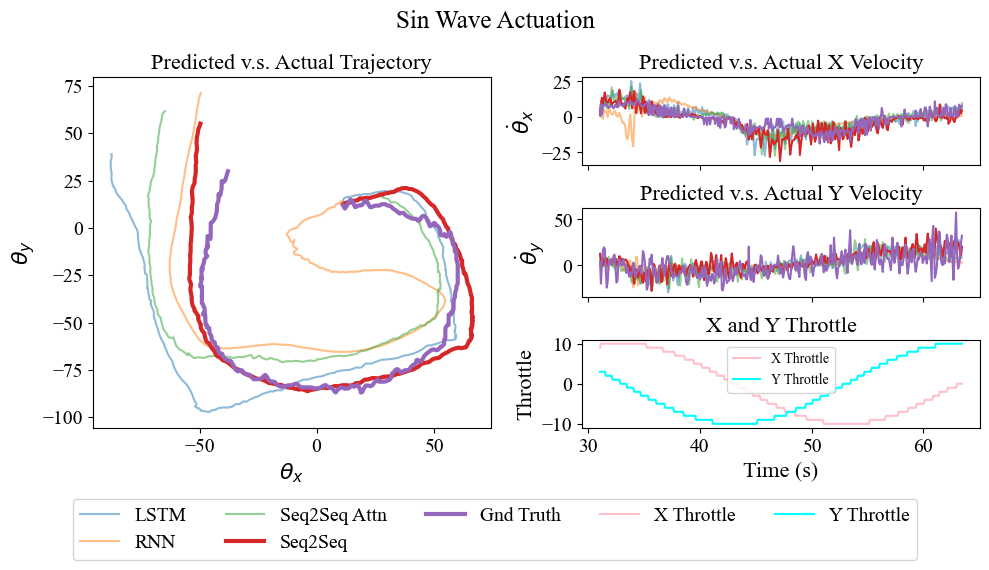

In [52]:
plot_graph(gnd_truth_sin, lstm_sin, seq2seq_sin, seq2seq_attn_sin, rnn_sin, "Sin Wave Actuation")

In [53]:
gnd_truth_square = pd.read_csv('../robo_limb_ml/results/oct_31/test/test_LSTM_b1024_e400_s-1_len100_ema_0.8_1730123022_square_purp_vid.csv', index_col=0)[100:]
lstm_square = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_LSTM_b1024_e400_s-1_len100_ema_0.8_1730123022_square_purp_vid.csv', index_col=0)[100:]
rnn_square = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_RNN_b1024_e400_s-1_len100_ema_0.8_1730126891_square_purp_vid.csv', index_col=0)[100:]
seq2seq_attn_square = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_SEQ2SEQ_ATTENTION_b1024_e400_s-1_len100_ema_0.8_1728875793_square_purp_vid.csv', index_col=0)[100:]
seq2seq_square = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_SEQ2SEQ_b1024_e400_s-1_len100_ema_0.8_1728882683_square_purp_vid.csv', index_col=0)[100:]

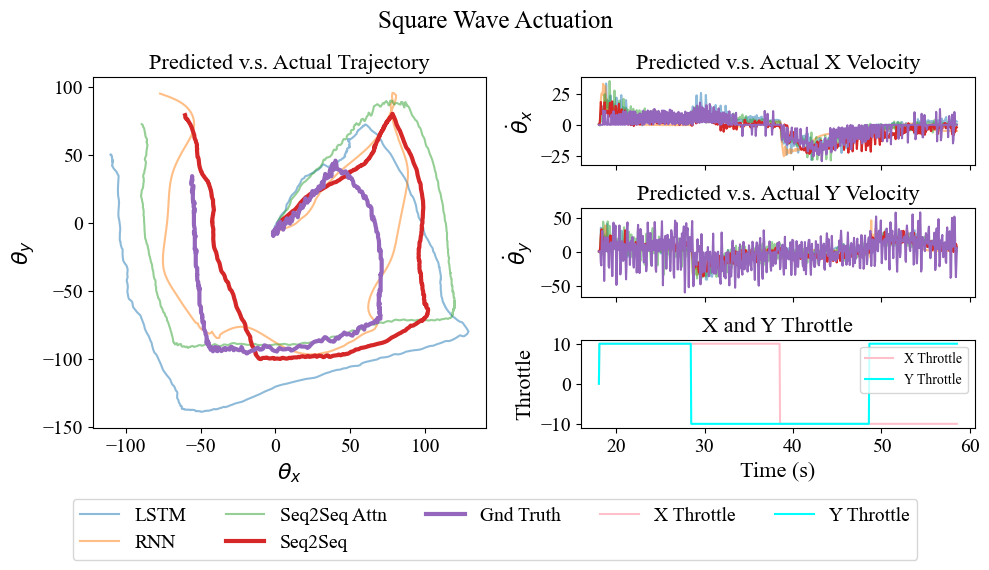

In [54]:
plot_graph(gnd_truth_square, lstm_square, seq2seq_square, seq2seq_attn_square, rnn_square, "Square Wave Actuation")

In [55]:
gnd_truth_saw_tooth = pd.read_csv('../robo_limb_ml/results/oct_31/test/test_LSTM_b1024_e400_s-1_len100_ema_0.8_1730123022_saw_tooth_purp_vid.csv', index_col=0)[100:]
lstm_saw_tooth = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_LSTM_b1024_e400_s-1_len100_ema_0.8_1730123022_saw_tooth_purp_vid.csv', index_col=0)[100:]
rnn_saw_tooth = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_RNN_b1024_e400_s-1_len100_ema_0.8_1730126891_saw_tooth_purp_vid.csv', index_col=0)[100:]
seq2seq_attn_saw_tooth = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_SEQ2SEQ_ATTENTION_b1024_e400_s-1_len100_ema_0.8_1728875793_saw_tooth_purp_vid.csv', index_col=0)[100:]
seq2seq_saw_tooth = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_SEQ2SEQ_b1024_e400_s-1_len100_ema_0.8_1728882683_saw_tooth_purp_vid.csv', index_col=0)[100:]

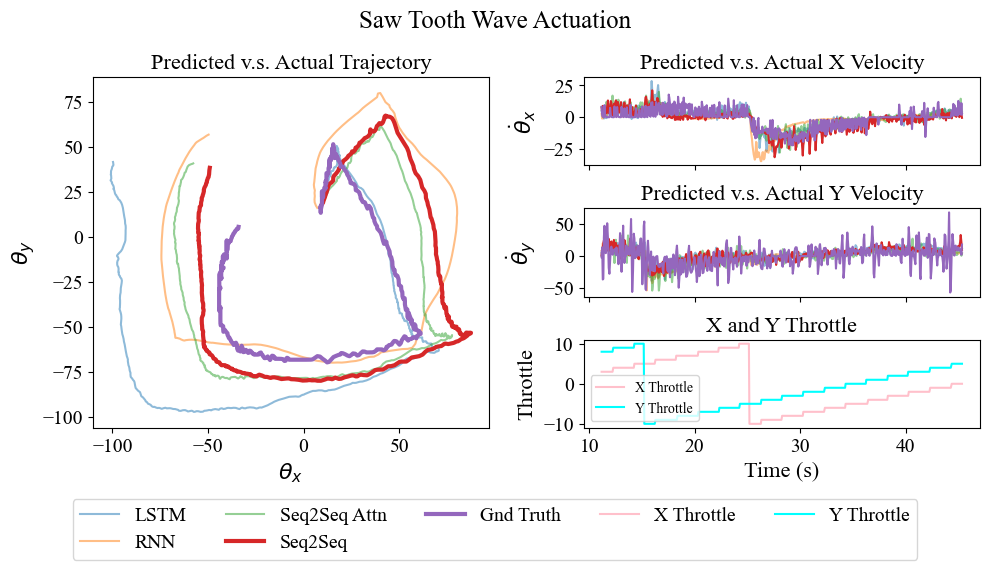

In [56]:
plot_graph(gnd_truth_saw_tooth, lstm_saw_tooth, seq2seq_saw_tooth, seq2seq_attn_saw_tooth, rnn_saw_tooth, "Saw Tooth Wave Actuation")

In [44]:
gnd_truth_blue = pd.read_csv('../robo_limb_ml/results/oct_31/test/test_FINETUNE_SEQ2SEQ_ATTENTION_b1024_e400_s25000_finetune_final_1730122927_square_blue_vid.csv', index_col=0)[100:]
fintuned_blue = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_FINETUNE_SEQ2SEQ_ATTENTION_b1024_e400_s25000_finetune_final_1730122927_square_blue_vid.csv', index_col=0)[100:]
no_fintuned_blue = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_SEQ2SEQ_ATTENTION_b1024_e400_s-1_len100_ema_0.8_1728875793_square_blue_vid.csv', index_col=0)[100:]
retrained_blue = pd.read_csv('../robo_limb_ml/results/oct_31/outputs/outputs_SEQ2SEQ_ATTENTION_b1024_e400_s25000_len100_25000_blue_1730124674_square_blue_vid.csv', index_col=0)[100:]

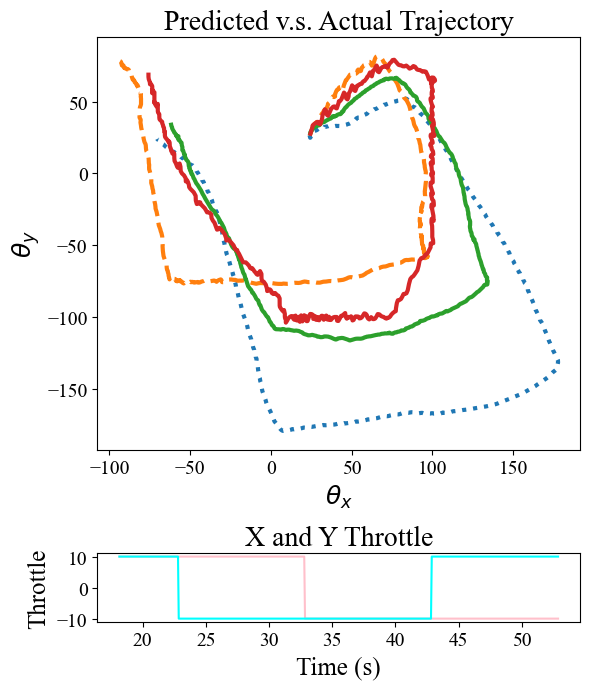

In [46]:
plot_graph_2(gnd_truth_blue, None, fintuned_blue, no_fintuned_blue, retrained_blue, "")

In [41]:

# gnd_truth_blue, None, fintuned_blue, no_fintuned_blue, retrained_blue, ""
def plot_graph_2(gnd_truth, lstm, seq2seq, seq2seq_attn, rnn, title):
    # Set up the figure and GridSpec layout with an increased width
    fig = plt.figure(figsize=(6, 7))
    gs = gridspec.GridSpec(4, 3)  # Adjusted grid to allocate more columns

    # Square plot on the left (occupies 3 rows and 3 columns in the grid)
    ax1 = fig.add_subplot(gs[:3, :])
    # line1,  = ax1.plot(lstm['theta_x'], lstm['theta_y'], label="LSTM", alpha=0.5)
    line2,  = ax1.plot(rnn['theta_x'], rnn['theta_y'], label="Retrained", linewidth=3, linestyle='dotted')
    line3,  = ax1.plot(seq2seq_attn['theta_x'], seq2seq_attn['theta_y'], label="Not Fine Tuned", linewidth=3, linestyle='dashed')
    line4,  = ax1.plot(seq2seq['theta_x'], seq2seq['theta_y'], label="Fine Tuned", linewidth=3)
    line5,  = ax1.plot(gnd_truth['theta_x'], gnd_truth['theta_y'], label="Gnd Truth", linewidth=3)
    ax1.set_title("Predicted v.s. Actual Trajectory", fontsize=20)
    ax1.set_xlabel(r"$\theta_x$", fontsize=18)
    ax1.set_ylabel(r"$\theta_y$", fontsize=18)
    # ax1.legend(loc='center', fontsize=14)

    # Three rectangular plots stacked to the right, occupying more columns
    # ax2 = fig.add_subplot(gs[0, 3:])
    # ax2.plot(lstm['time_begin_traj'], lstm['vel_x'], label="LSTM", alpha=0.5)
    # ax2.plot(rnn['time_begin_traj'], rnn['vel_x'], label="RNN", alpha=0.5)
    # ax2.plot(seq2seq_attn['time_begin_traj'], seq2seq_attn['vel_x'], label="Seq2Seq Attn", alpha=0.5)
    # ax2.plot(seq2seq['time_begin_traj'], seq2seq['vel_x'], label="Seq2Seq")
    # ax2.plot(gnd_truth['time_begin_traj'], gnd_truth['vel_x'], label="Gnd Truth")
    # ax2.set_title("Predicted v.s. Actual X Velocity", fontsize=16)
    # ax2.tick_params(labelbottom=False)
    # ax2.set_ylabel(r"$\dot\theta_x$", fontsize=16)
    # ax2.legend()

    # ax3 = fig.add_subplot(gs[1, 3:], sharex=ax2)
    # ax3.plot(lstm['time_begin_traj'], lstm['vel_y'], label="LSTM", alpha=0.5)
    # ax3.plot(rnn['time_begin_traj'], rnn['vel_y'], label="RNN", alpha=0.5)
    # ax3.plot(seq2seq_attn['time_begin_traj'], seq2seq_attn['vel_y'], label="Seq2Seq Attn", alpha=0.5)
    # ax3.plot(seq2seq['time_begin_traj'], seq2seq['vel_y'], label="Seq2Seq")
    # ax3.plot(gnd_truth['time_begin_traj'], gnd_truth['vel_y'], label="Gnd Truth")
    # ax3.set_title("Predicted v.s. Actual Y Velocity", fontsize=16)
    # ax3.tick_params(labelbottom=False)
    # ax3.set_ylabel(r"$\dot\theta_y$", fontsize=16)
    # # ax3.set_ylim(-10, 10)  # Limiting y-axis for tan(x) to avoid extreme values
    # # ax3.legend()

    ax4 = fig.add_subplot(gs[3:, :])
    line6,  = ax4.plot(gnd_truth['time_begin_traj'], gnd_truth['X_throttle'], label="X Throttle", color='pink')
    line7,  = ax4.plot(gnd_truth['time_begin_traj'], gnd_truth['Y_throttle'], label="Y Throttle", color='cyan')
    ax4.set_title("X and Y Throttle", fontsize=20)
    ax4.set_xlabel("Time (s)", fontsize=18)
    ax4.set_ylabel("Throttle", fontsize=18)
    # ax4.legend()

    handles = [line2, line3, line4, line5, line6, line7]
    labels = [line.get_label() for line in handles]
    # fig.legend(handles, labels, loc='upper left', ncol=1, bbox_to_anchor=(1, 1), fontsize=16)
    # Adjust layout and display the plots
    # fig.suptitle(title, fontsize=18)
    plt.tight_layout()
    plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

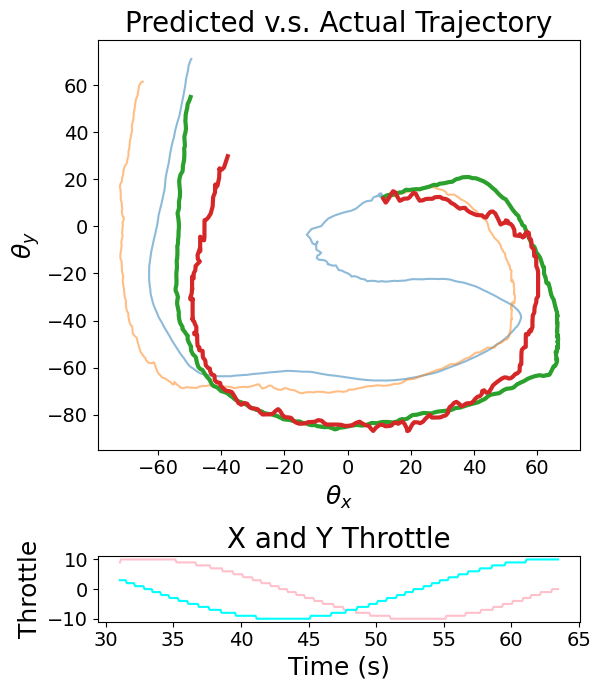

In [10]:
plot_graph_2(gnd_truth_sin, lstm_sin, seq2seq_sin, seq2seq_attn_sin, rnn_sin, "Sin Wave Actuation")

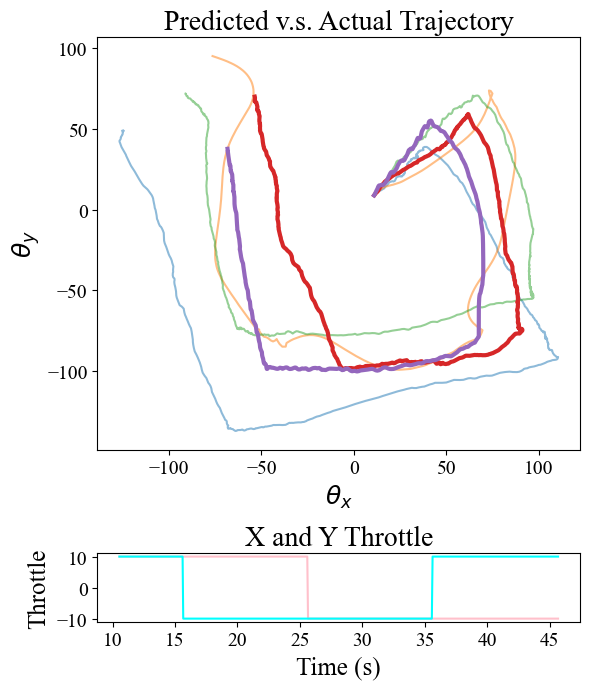

In [131]:
plot_graph_2(gnd_truth_square, lstm_square, seq2seq_square, seq2seq_attn_square, rnn_square, "Sin Wave Actuation")

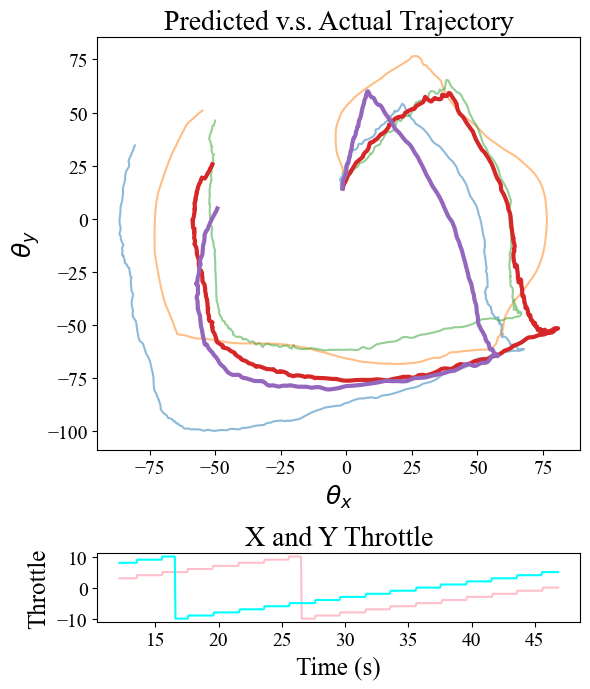

In [132]:
plot_graph_2(gnd_truth_saw_tooth, lstm_saw_tooth, seq2seq_saw_tooth, seq2seq_attn_saw_tooth, rnn_saw_tooth, "Sin Wave Actuation")